<h1>CS 41344 - Natural Language Processing</h1>
<h2 style = 'color:yellow'>Assignment - 2: Text Analysis</h2>

<h3 style = 'color:lightgreen'>0. Import Libraries</h3>

In [29]:
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

from PIL import Image as Im
import imageio
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

<h3 style = 'color:lightgreen'>1. Load Text/Data</h3>

In [4]:
textTotal = open("../0. Data/RomeoJuliet.txt", "r").read()
blobTotal = TextBlob(textTotal)

numChars = 1000
text1000 = textTotal[:numChars + 1]
blobTotal1000 = TextBlob(text1000)

In [5]:
def print_words(list_words, numElementsRow):
    for j in range(0, len(list_words), numElementsRow):
        for i in range(j, j + numElementsRow):
            if (i >= len(list_words)):
                break
            print(i, '.', list_words[i], end=", ")
        print()
    print()

<h3 style = 'color:lightgreen'>2. Assignment</h3>
<h3 style = 'color:green'>2.1. Count and Display the words in the first 1,000 characters of the text. Display all the words by printing 10 words per line</h3>

In [7]:
print(f"Count of Words: {len(blobTotal1000.words)}")
print_words(blobTotal1000.words, 10)

Count of Words: 167
0 . Project, 1 . Gutenberg, 2 . ’, 3 . s, 4 . Romeo, 5 . and, 6 . Juliet, 7 . by, 8 . William, 9 . Shakespeare, 
10 . This, 11 . eBook, 12 . is, 13 . for, 14 . the, 15 . use, 16 . of, 17 . anyone, 18 . anywhere, 19 . in, 
20 . the, 21 . United, 22 . States, 23 . and, 24 . most, 25 . other, 26 . parts, 27 . of, 28 . the, 29 . world, 
30 . at, 31 . no, 32 . cost, 33 . and, 34 . with, 35 . almost, 36 . no, 37 . restrictions, 38 . whatsoever, 39 . You, 
40 . may, 41 . copy, 42 . it, 43 . give, 44 . it, 45 . away, 46 . or, 47 . re-use, 48 . it, 49 . under, 
50 . the, 51 . terms, 52 . of, 53 . the, 54 . Project, 55 . Gutenberg, 56 . License, 57 . included, 58 . with, 59 . this, 
60 . eBook, 61 . or, 62 . online, 63 . at, 64 . www.gutenberg.org, 65 . If, 66 . you, 67 . are, 68 . not, 69 . located, 
70 . in, 71 . the, 72 . United, 73 . States, 74 . you, 75 . ’, 76 . ll, 77 . have, 78 . to, 79 . check, 
80 . the, 81 . laws, 82 . of, 83 . the, 84 . country, 85 . where, 86 . y

<h3 style = 'color:green'>2.2 Count Words in the entire text</h3>

In [8]:
print(f"Count of Words: {len(blobTotal.words)}")

Count of Words: 30796


<h3 style = 'color:green'>2.3 Count Unique Words in the entire text</h3>

In [15]:
print(f"Total number of Unique Words: {len(set(blobTotal.words))}")

Total number of Unique Words: 4743


<h3 style = 'color:green'>2.4 Count Words in the entire text after removing stop words</h3>

In [14]:
# Remove stop words from blobTotal

stop_words = stopwords.words('english')
blobTotalFiltered = [word for word in blobTotal.words if word not in stop_words]
print(f"Number of words after removing stop words: {len(set(blobTotalFiltered))}")

Number of words after removing stop words: 4617


<h3 style = 'color:green'>2.5 Print top-10 words in the entire text with highest frequency</h3>

In [18]:
# Find word frequency in blobTotal
word_freq = {}
for word in blobTotal.words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

df_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
df_word_freq[:10]

[('’', 869),
 ('the', 783),
 ('I', 652),
 ('and', 554),
 ('to', 537),
 ('of', 479),
 ('a', 461),
 ('in', 361),
 ('is', 332),
 ('you', 327)]

<h3 style = 'color:green'>2.6 Print top-10 words in the entire text with highest frequency after removing stop words</h3>

In [20]:
# Find word frequency in blobTotalFiltered
word_freq = {}
for word in blobTotalFiltered:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

df_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
df_word_freq[:10]

[('’', 869),
 ('I', 652),
 ('And', 250),
 ('thou', 236),
 ('ROMEO', 167),
 ('Romeo', 153),
 ('O', 153),
 ('thy', 151),
 ('love', 142),
 ('thee', 137)]

<h3 style = 'color:green'>2.7 Count and display the noun-phrases in the first 1000 characters of the text. Display all noun-phrases by printing 3 noun-phrases per line.</h3>

In [22]:
print(f"Total Noun Phrases: {len(blobTotal1000.noun_phrases)}")
print_words(blobTotal1000.noun_phrases, 3)  

Total Noun Phrases: 31
0 . project gutenberg, 1 . ’ s, 2 . romeo, 
3 . juliet, 4 . william shakespeare, 5 . restrictions whatsoever, 
6 . project gutenberg license, 7 . ’ ll, 8 . title, 
9 . romeo, 10 . juliet author, 11 . william shakespeare release date, 
12 . november, 13 . etext, 14 . updated, 
15 . january, 16 . language, 17 . english character, 
18 . utf-8, 19 . * * *, 20 . start of this project gutenberg ebook romeo and juliet, 
21 . * * *, 22 . pg shakespeare team, 23 . project gutenberg, 
24 . the tragedy of romeo and juliet, 25 . william shakespeare contents the prologue, 26 . act, 
27 . scene, 28 . public place, 29 . scene ii, 
30 . sc, 



<h3 style = 'color:green'>2.8 Count Noun Phrases in the entire text</h3>

In [23]:
print(f"Total Noun Phrases: {len(blobTotal.noun_phrases)}")

Total Noun Phrases: 5039


<h3 style = 'color:green'>2.9 Print the top-10 noun phrases in the entire text with highest frequency</h3>

In [26]:
noun_phrases = {}
for noun in blobTotal.noun_phrases:
    if noun in noun_phrases:
        noun_phrases[noun] += 1
    else:
        noun_phrases[noun] = 1

df_noun_phrases = sorted(noun_phrases.items(), key=lambda x: x[1], reverse=True)
df_noun_phrases[:10]

[('romeo', 297),
 ('juliet', 177),
 ('nurse', 132),
 ('capulet', 106),
 ('’ s', 98),
 ('mercutio', 86),
 ('tybalt', 75),
 ('benvolio', 72),
 ('friar lawrence', 69),
 ('’ ll', 68)]

<h3 style = 'color:green'>2.10 Print the words in the entire text that contain a string 'WA'</h3>

In [27]:
for word in blobTotal.words:
    if 'WA' in word:
        print(word)

WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WARRANTY
WARRANTY
WARRANTIES
WARRANTIES


<h3 style = 'color:green'>2.11 Visualize Word Frequencies using Word Cloud</h3>

C:\Users\Owner\AppData\Local\Temp\ipykernel_37300\504181450.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_heart = imageio.imread(str("../3. Images/Masks/mask_heart.png"))


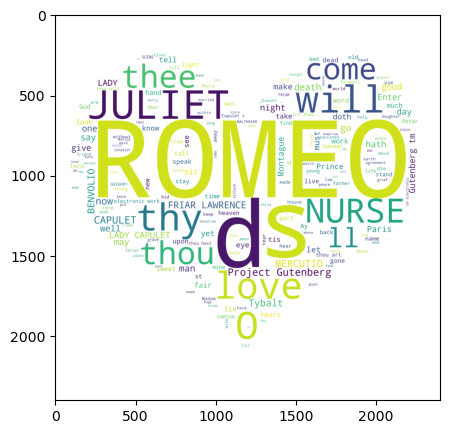

In [30]:
mask_heart = imageio.imread(str("../3. Images/Masks/mask_heart.png"))
#vwordcloud = WordCloud(background_color = "white", mask = mask_heart, contour_width = 3, contour_color = 'steelblue')
wordcloud = WordCloud(background_color = "white", mask = mask_heart)
wordcloudImage = wordcloud.generate(textTotal)
wordcloudFile = wordcloudImage.to_file("romeojuliet.png")
wordcloudImage.to_image
im_ = Im.open("romeojuliet.png")
fix, ax = plt.subplots(figsize = (5, 5))
ax.imshow(im_)